In [1]:
#Benjamin Schreyer benontheplanet@gmail.com

#TODO:
#RungeKutta aribtrary precision in compiled language




import matplotlib.pyplot as plt
from mpmath import mpmathify
import mpmath as mp
import numpy as np
import math
import time

from functions_bending_schreyer import *

###
### Need to look at Green's function iteration methods, it seems like this could work, certainly
### for the case of constantI(s)

#https://www.johndcook.com/blog/2020/02/13/runge-kutta-methods/
#https://nodepy.readthedocs.io/en/latest/modules/runge_kutta_method.html#nodepy.runge_kutta_method.DC
#https://ntrs.nasa.gov/api/citations/19710018627/downloads/19710018627.pdf

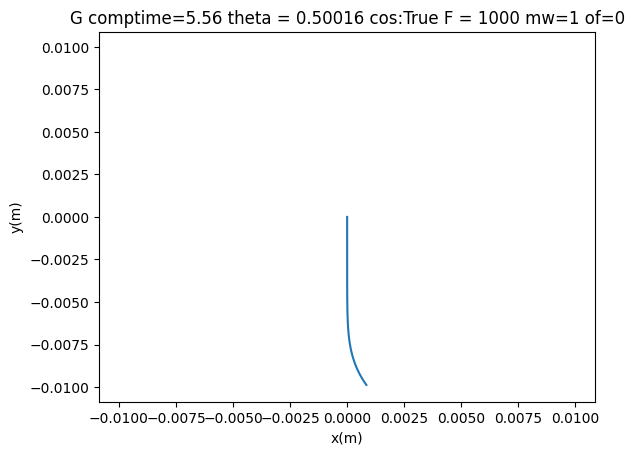

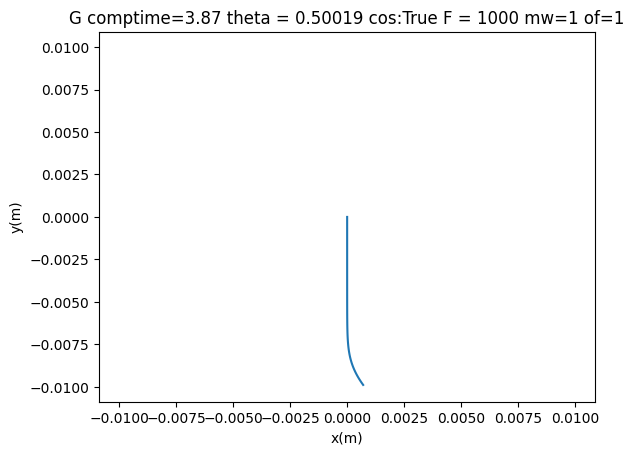

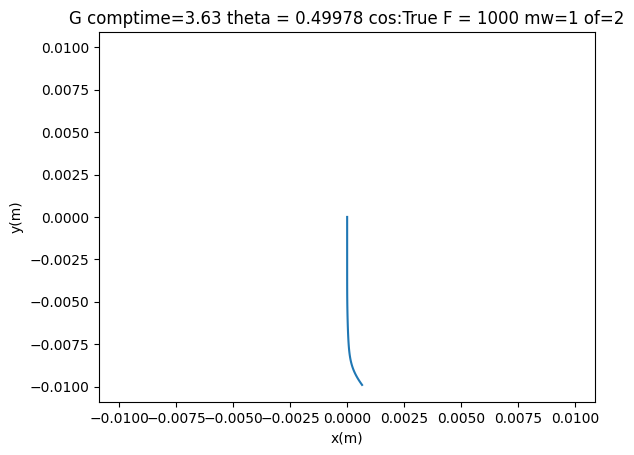

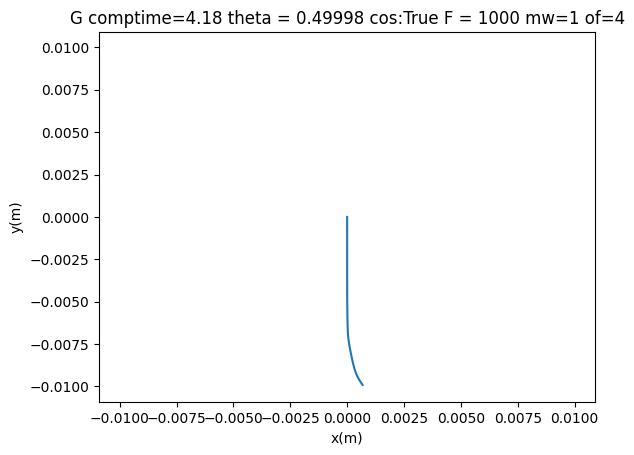

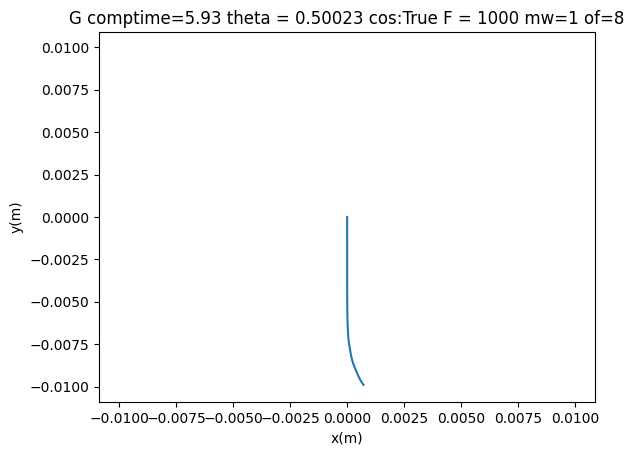

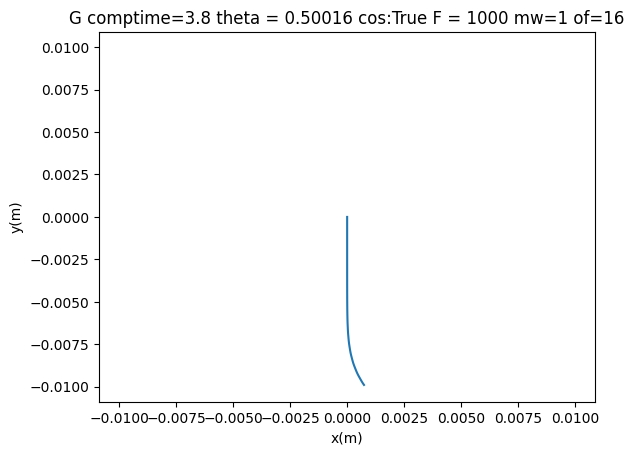

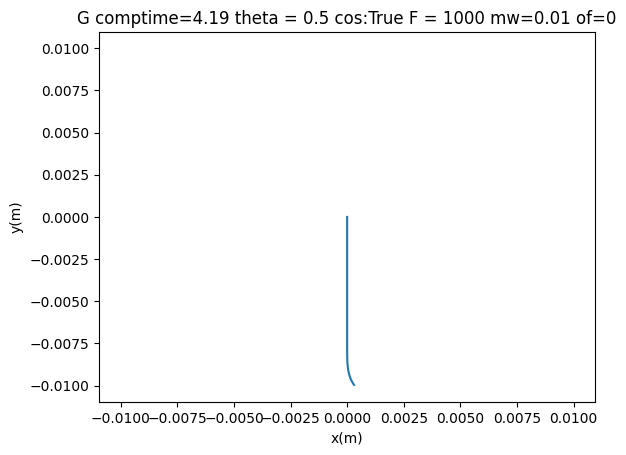

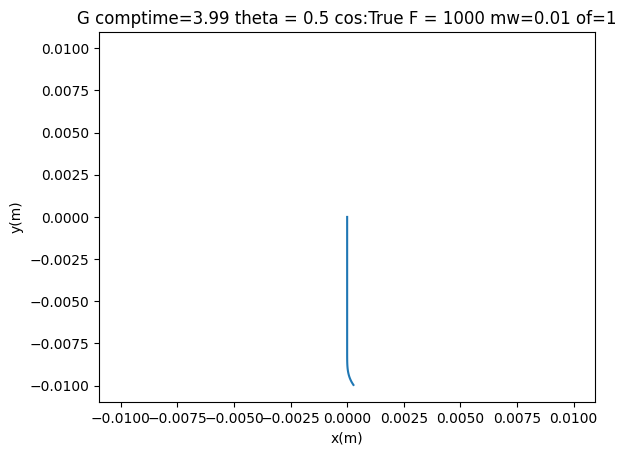

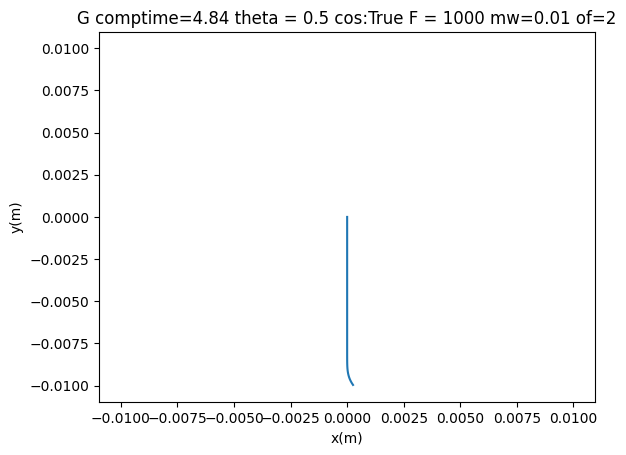

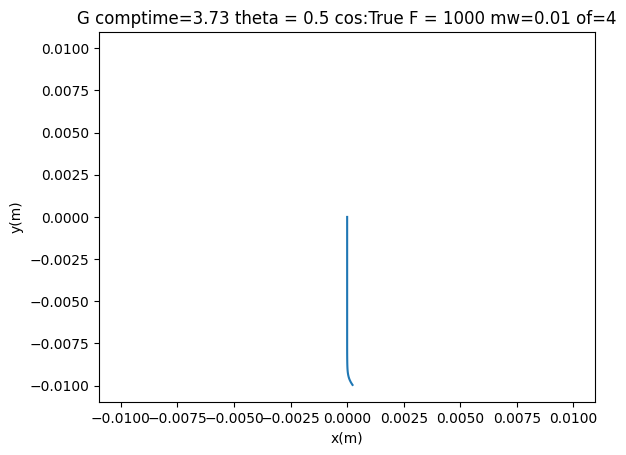

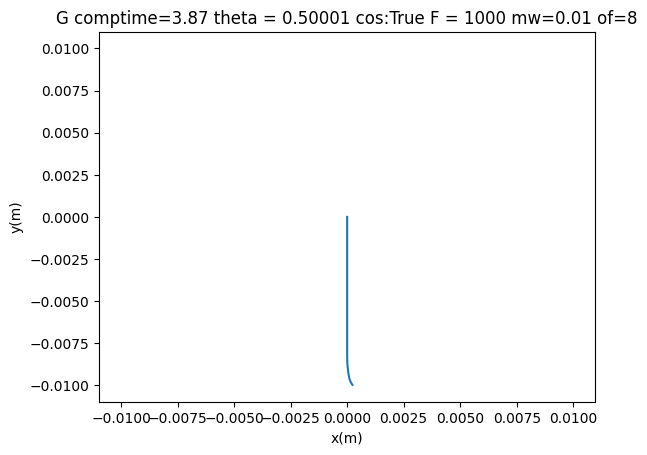

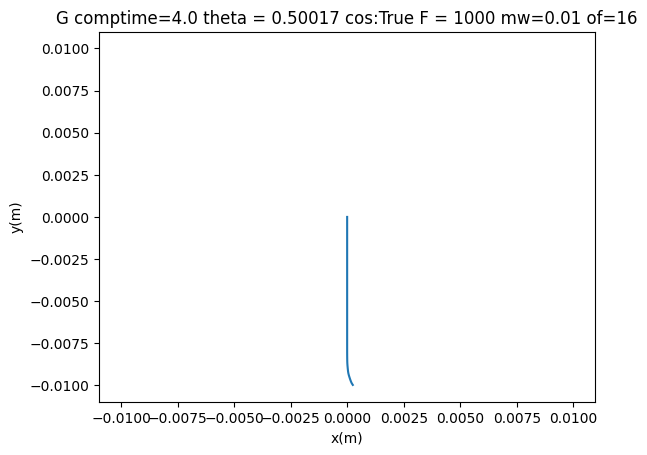

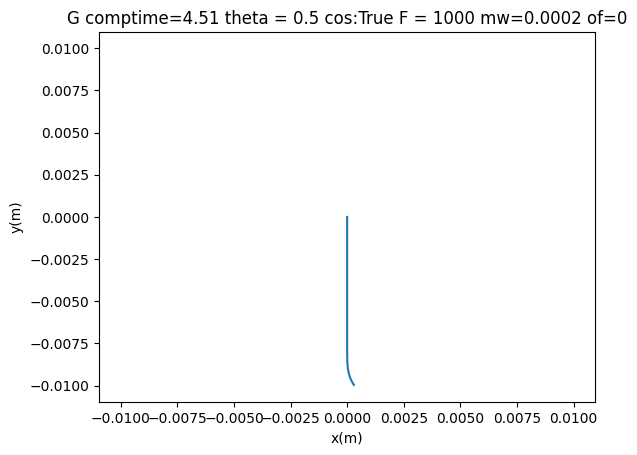

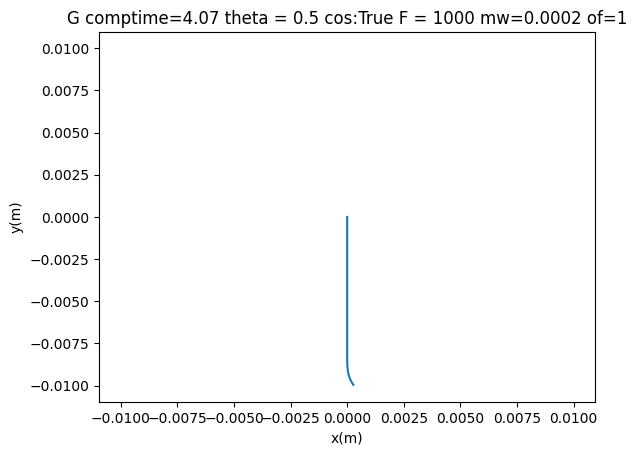

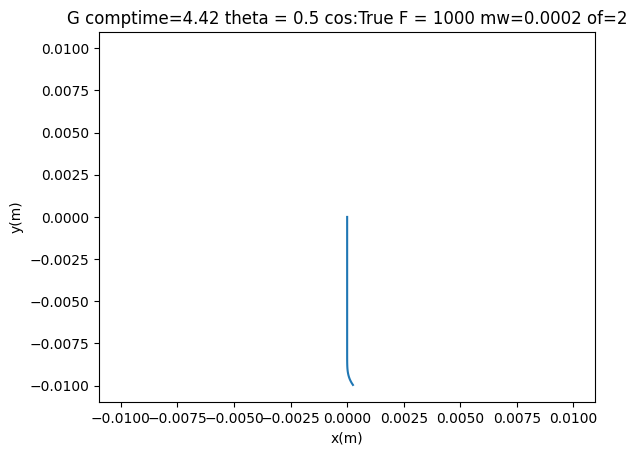

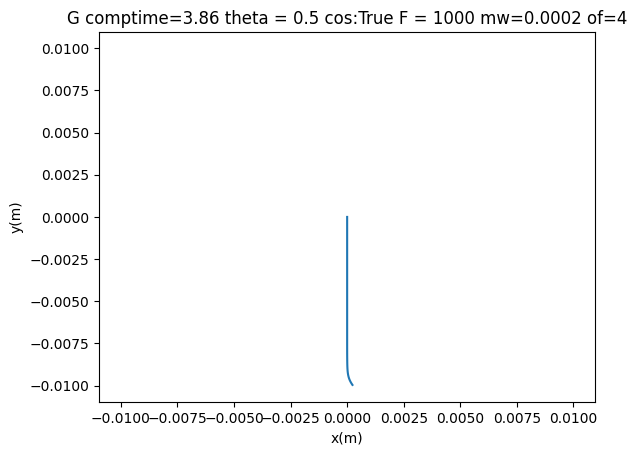

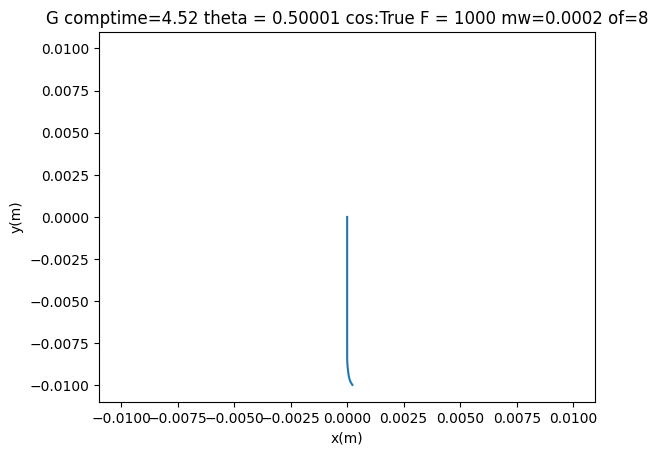

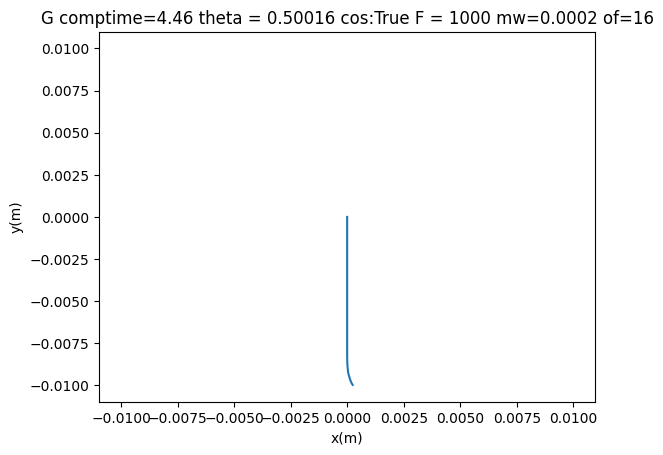

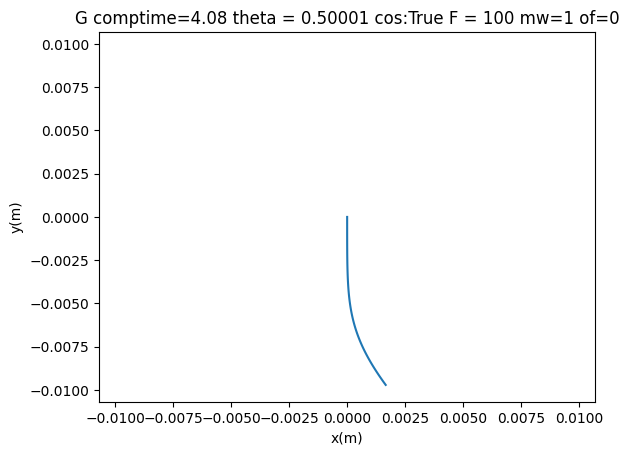

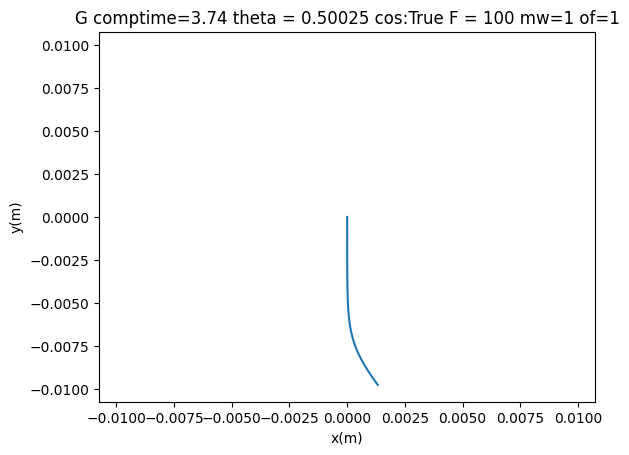

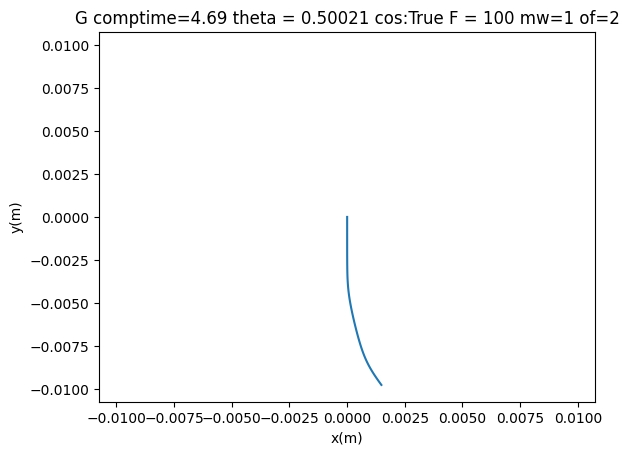

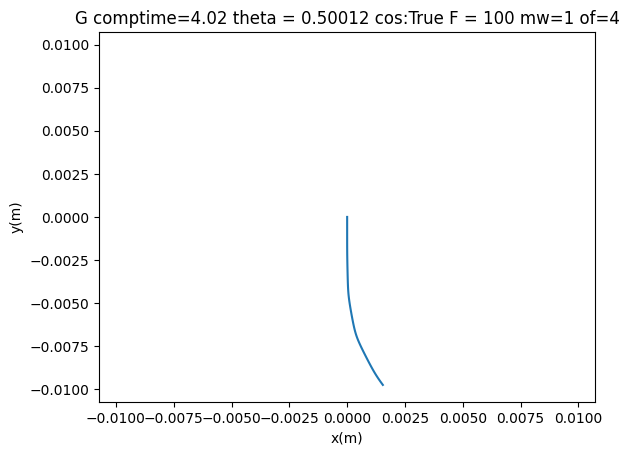

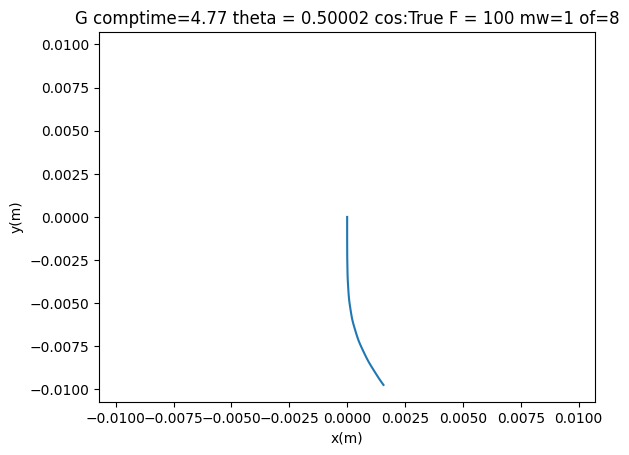

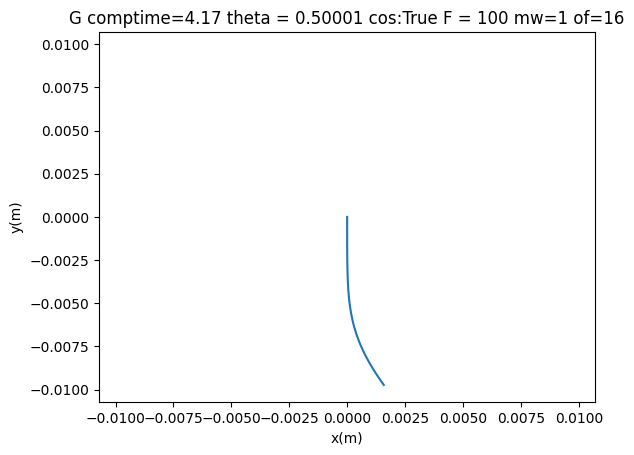

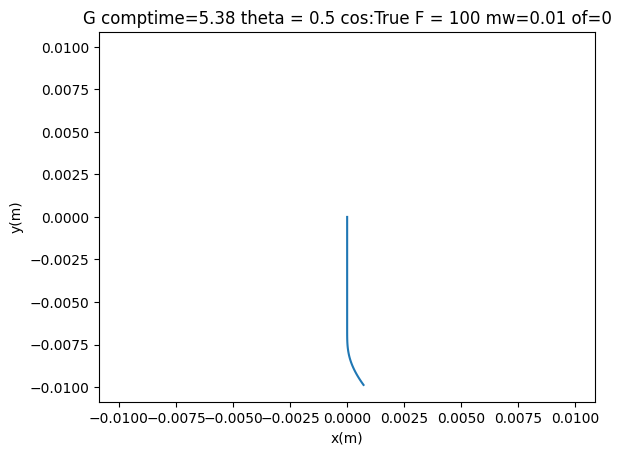

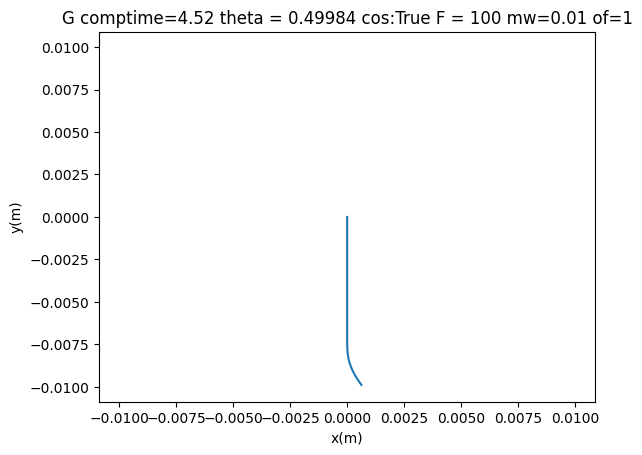

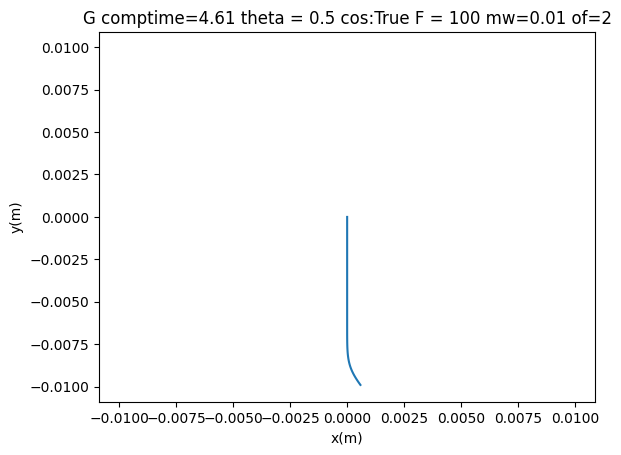

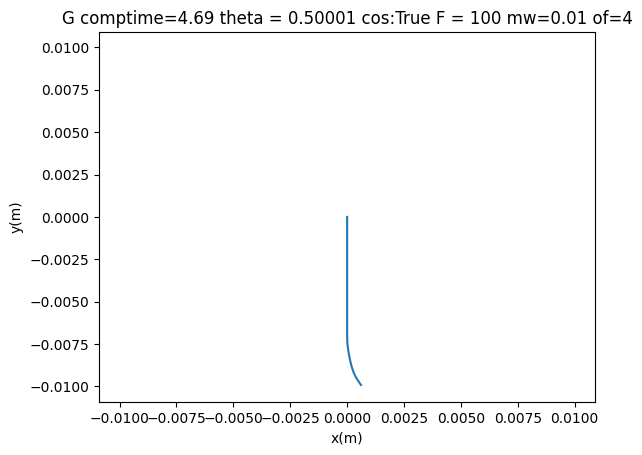

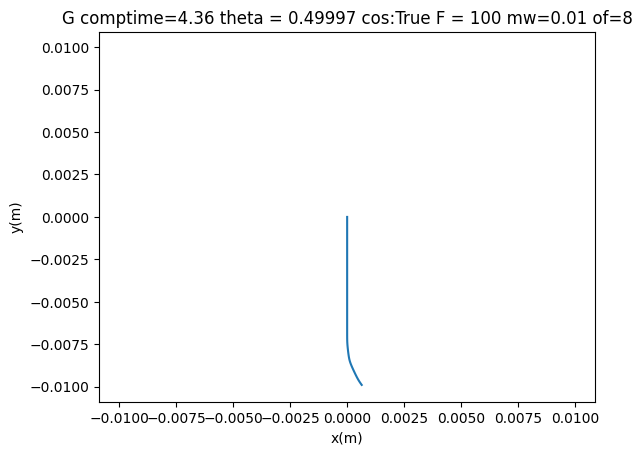

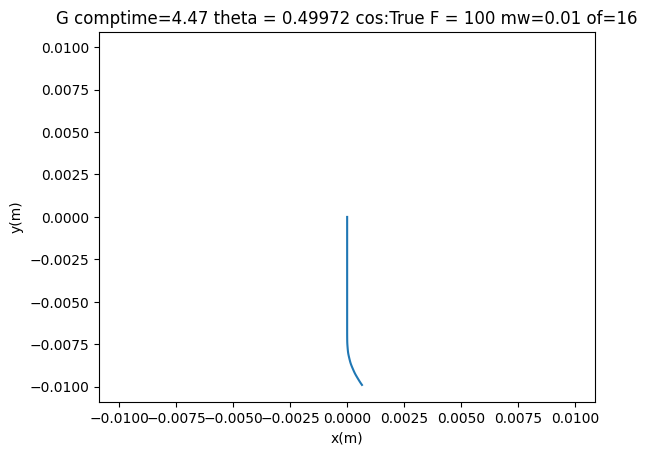

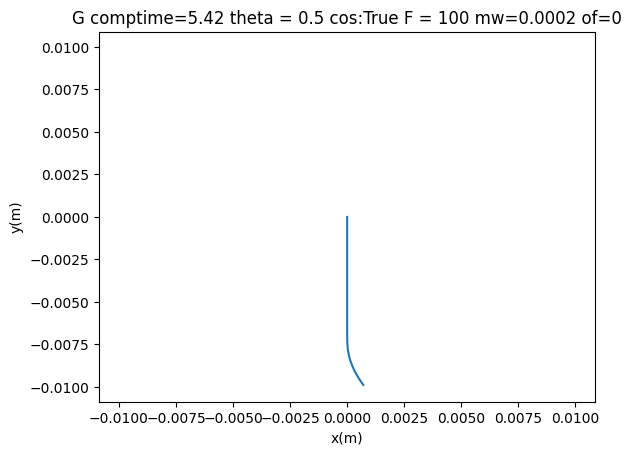

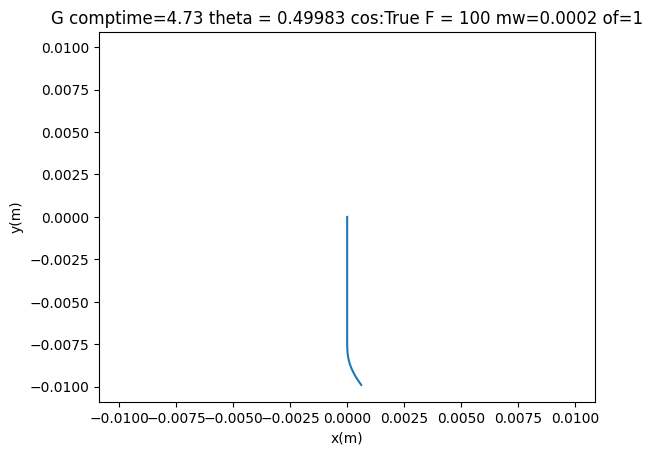

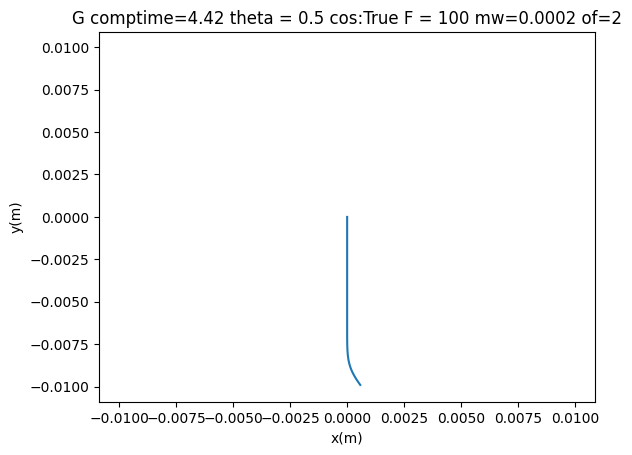

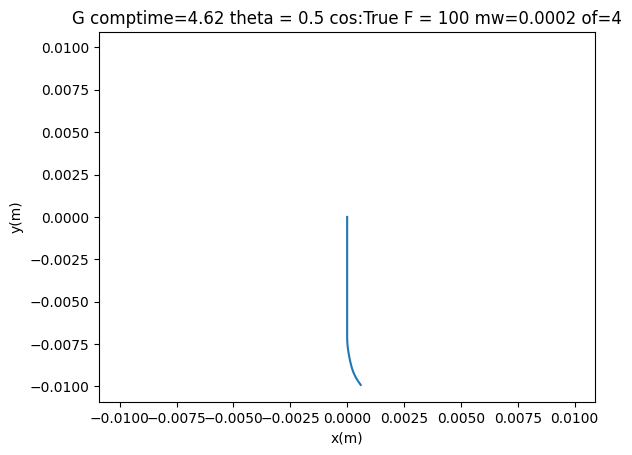

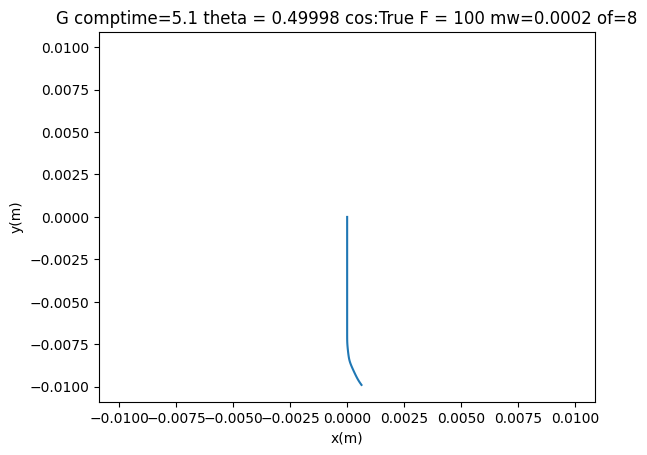

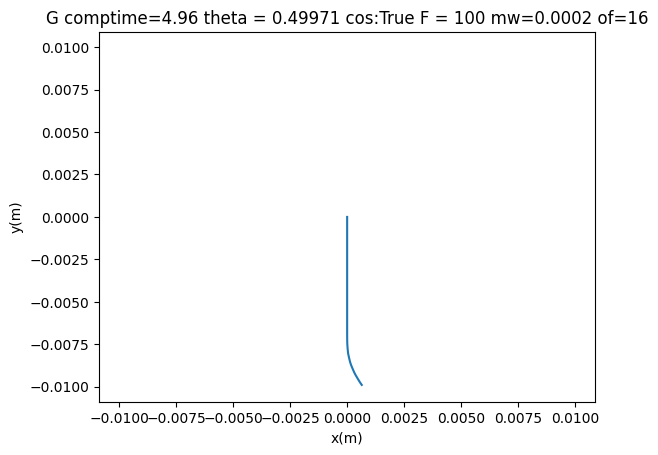

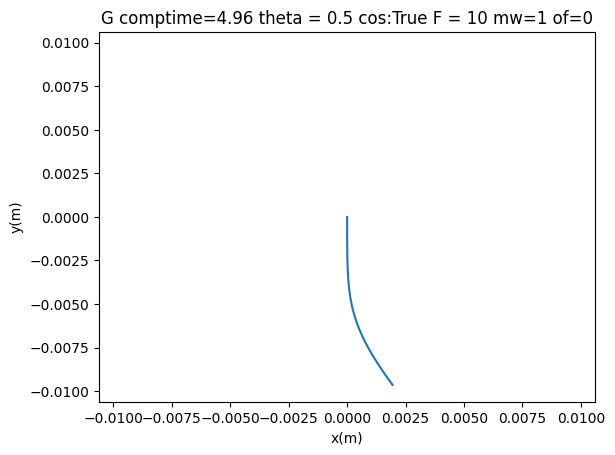

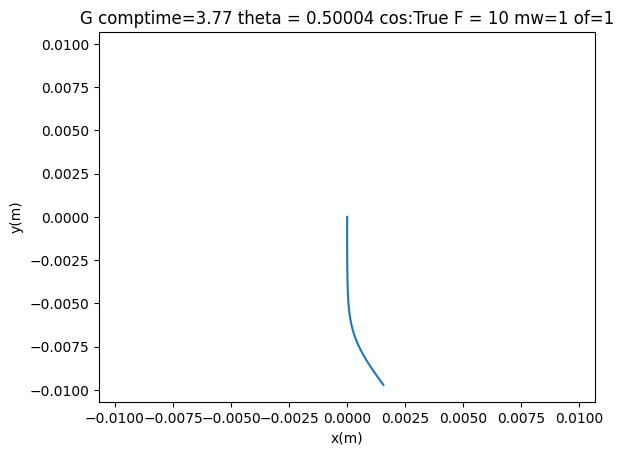

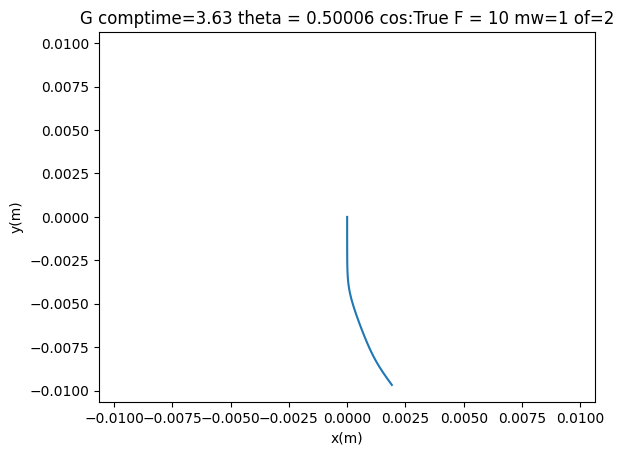

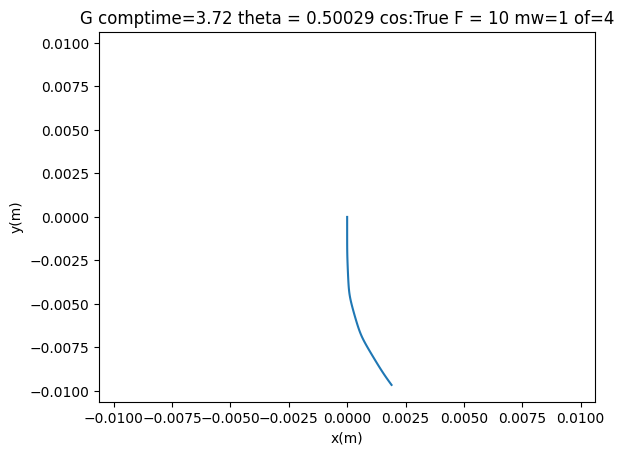

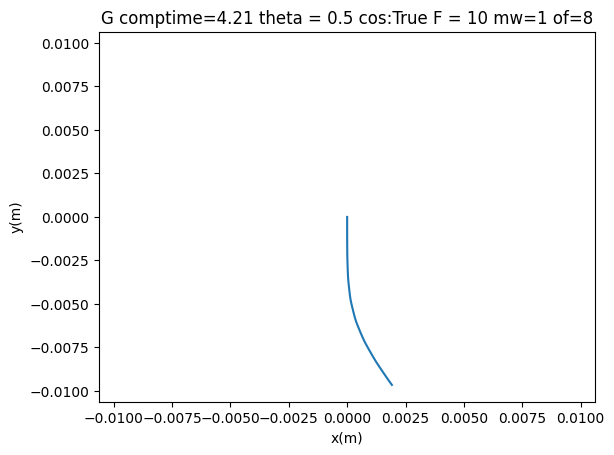

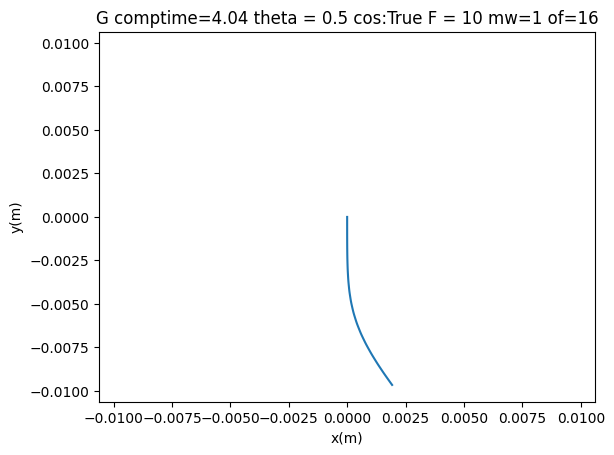

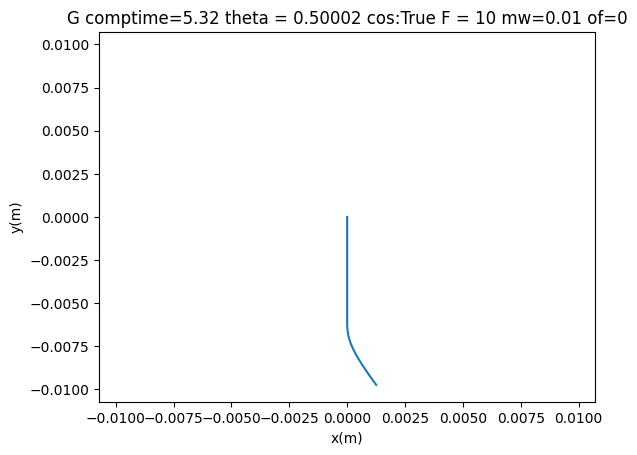

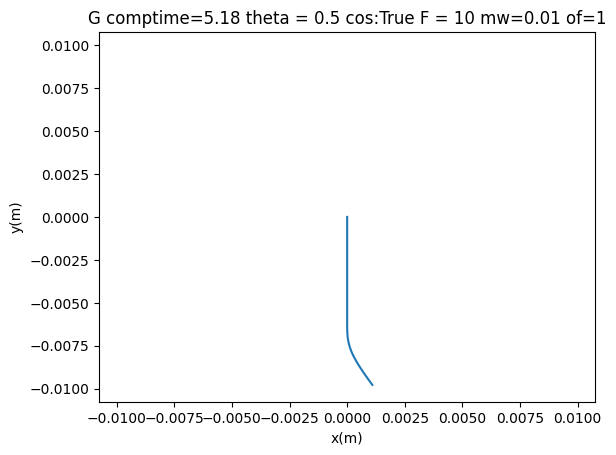

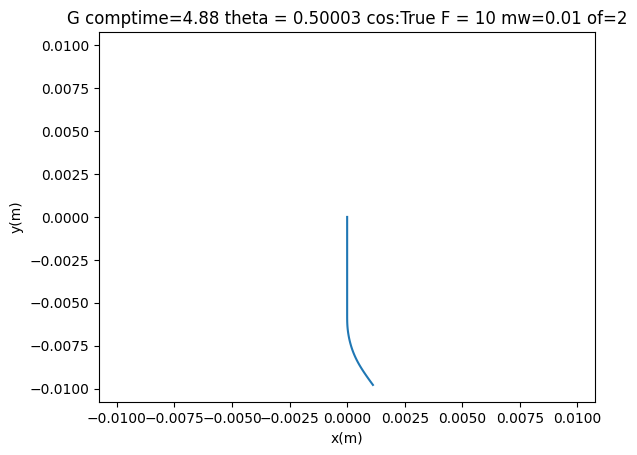

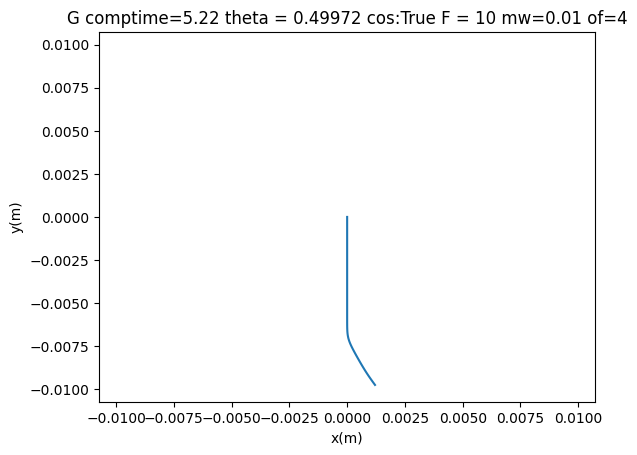

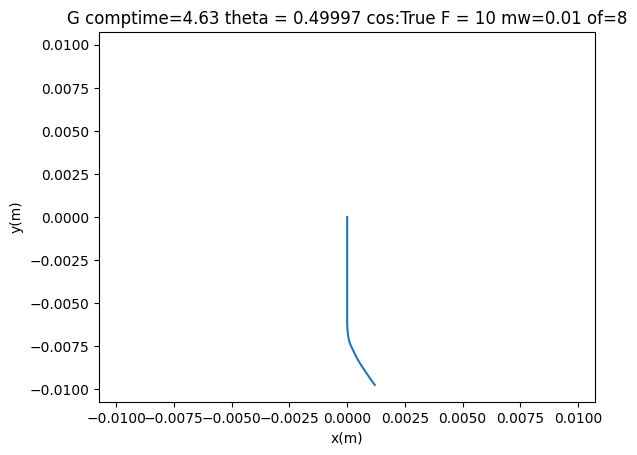

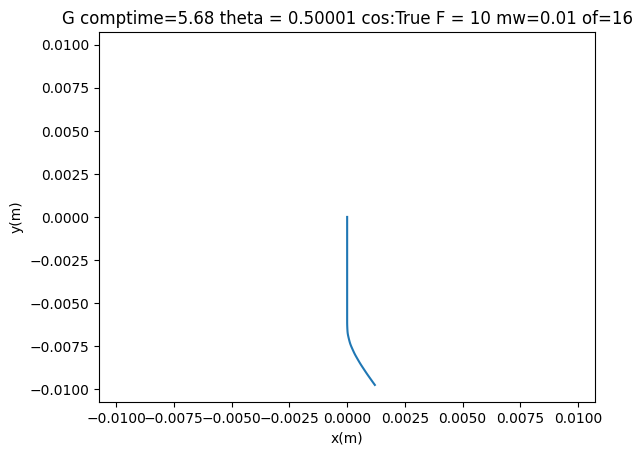

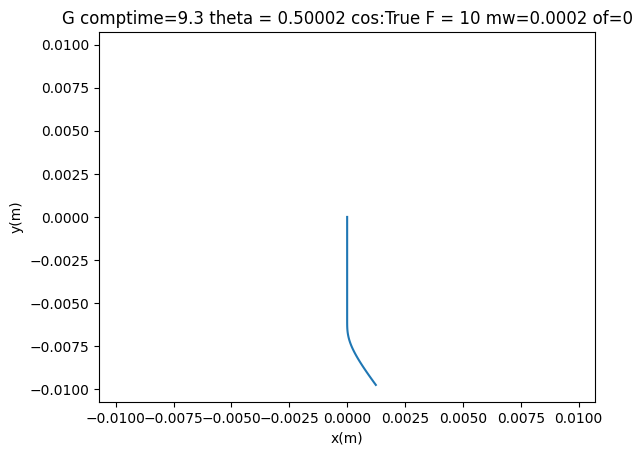

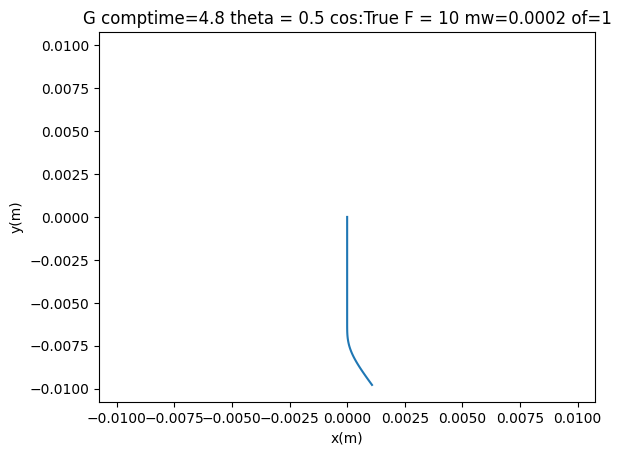

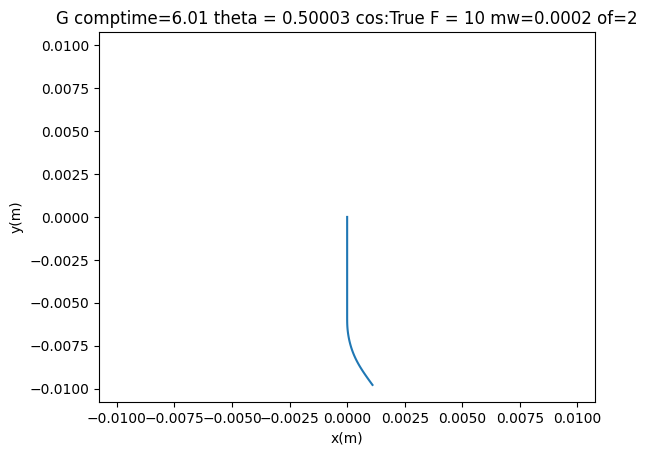

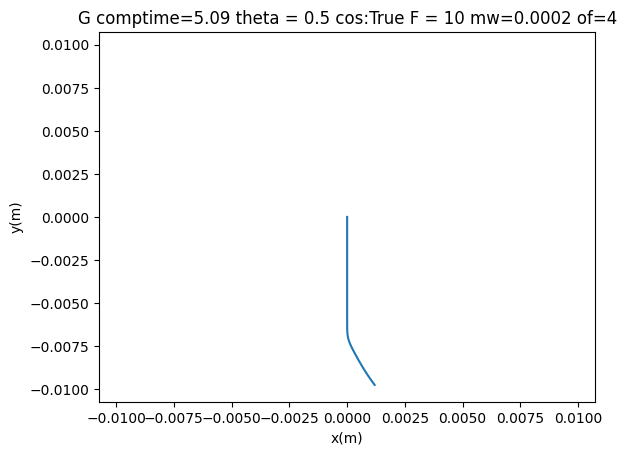

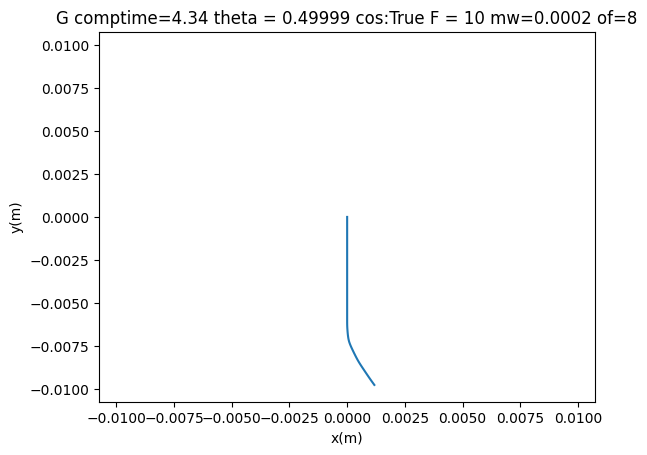

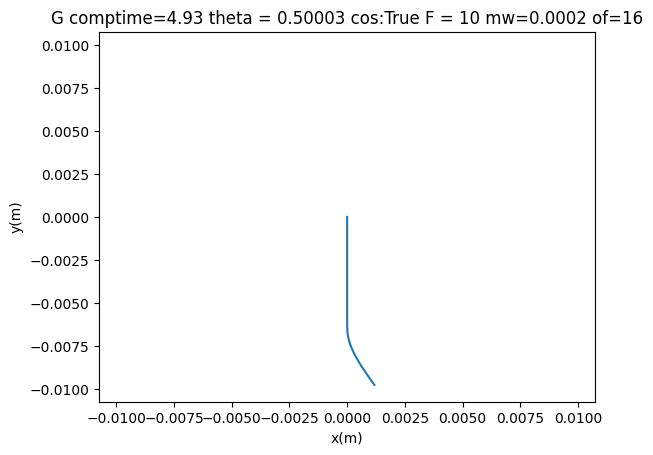

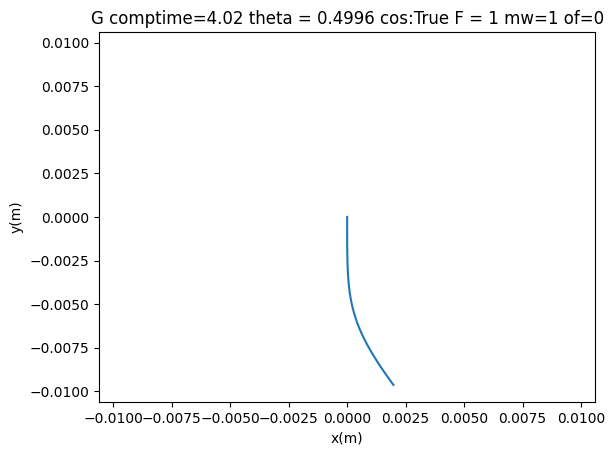

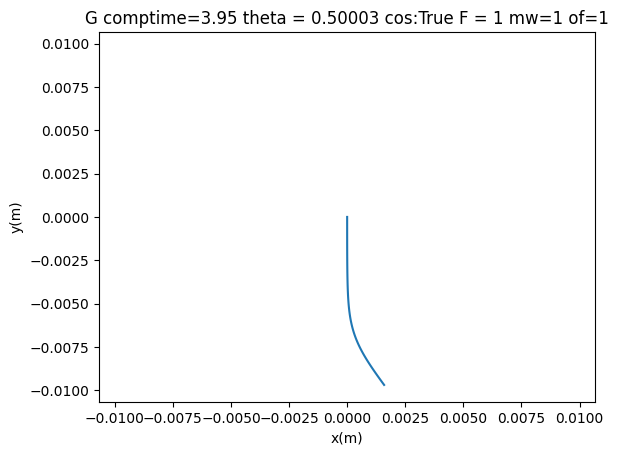

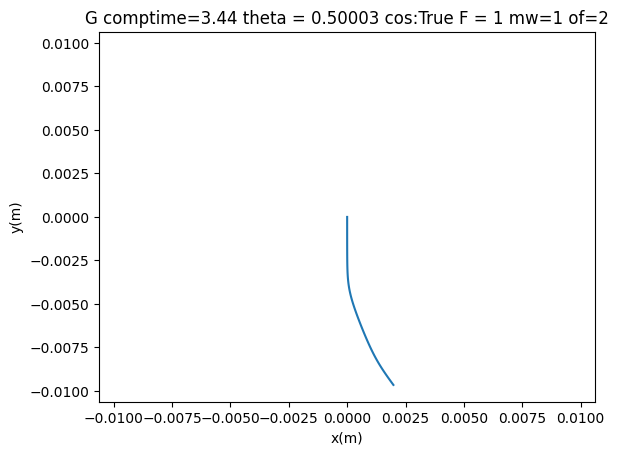

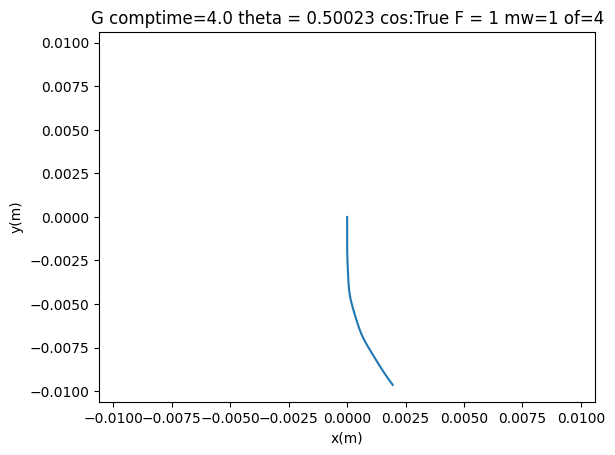

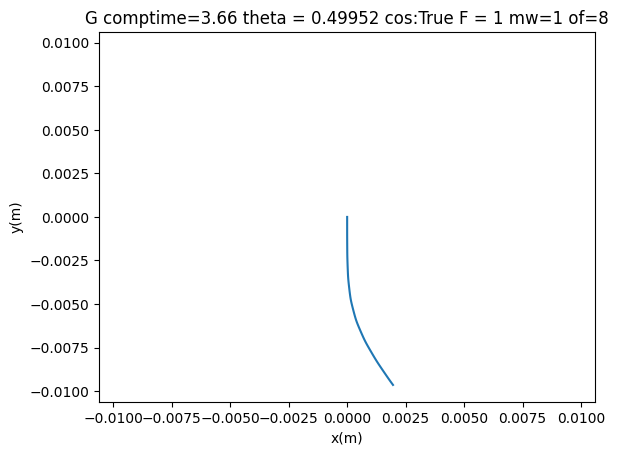

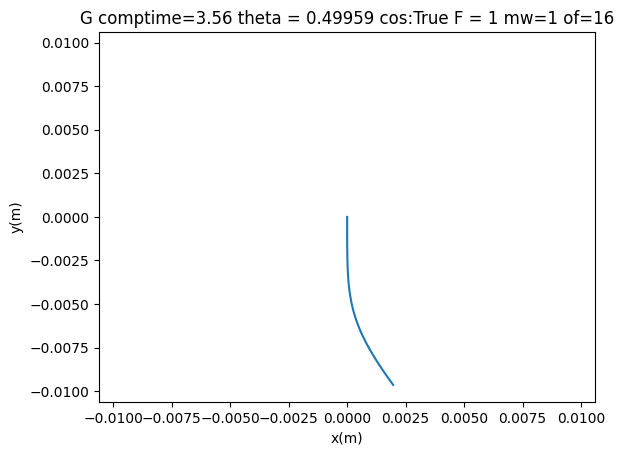

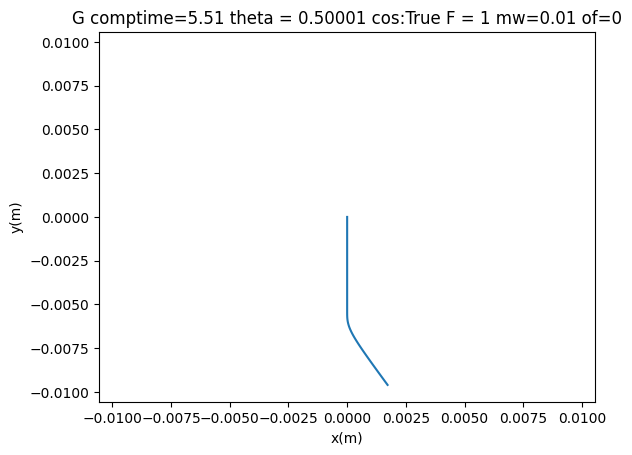

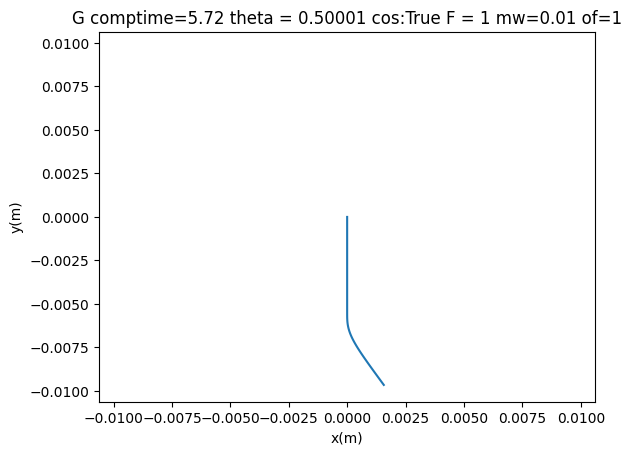

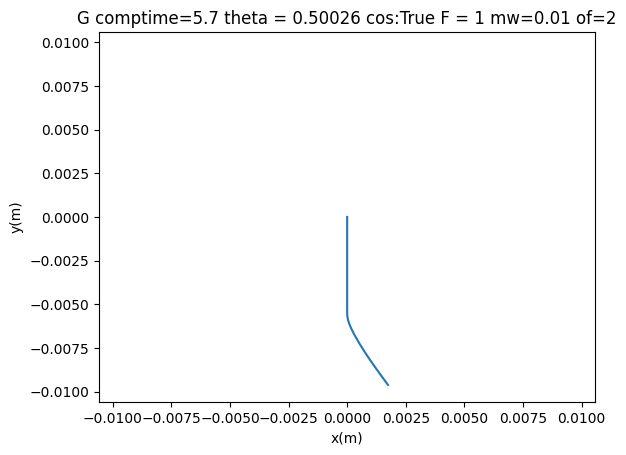

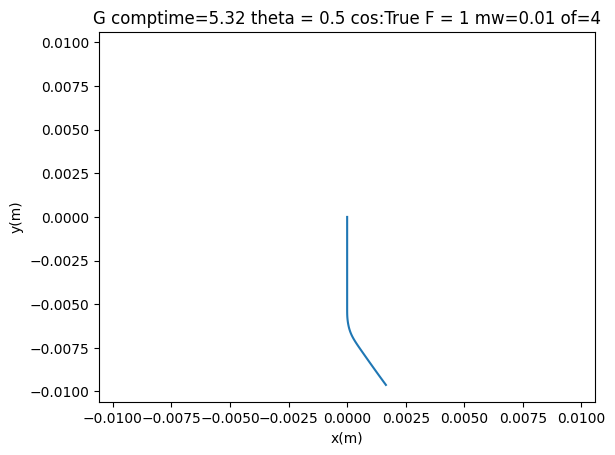

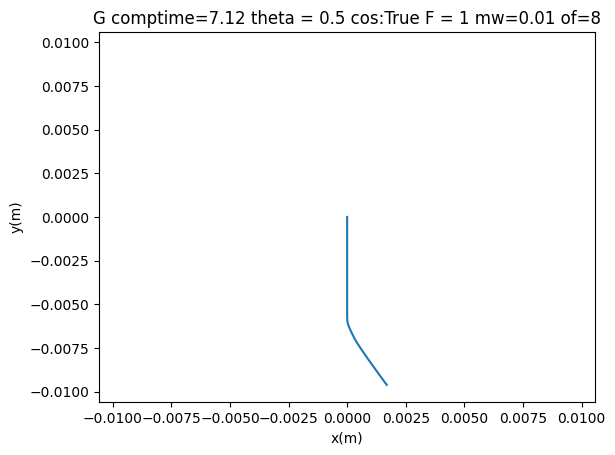

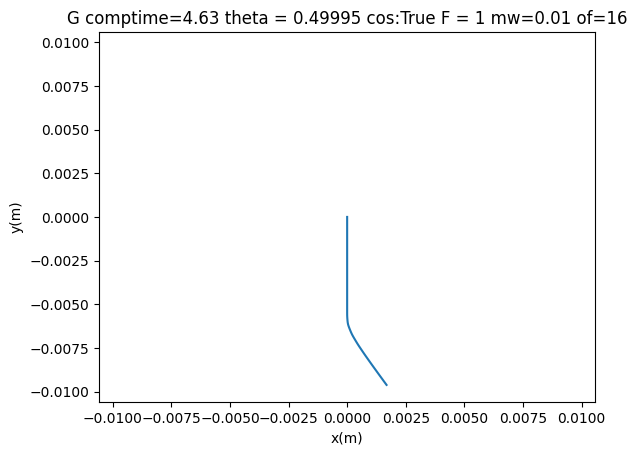

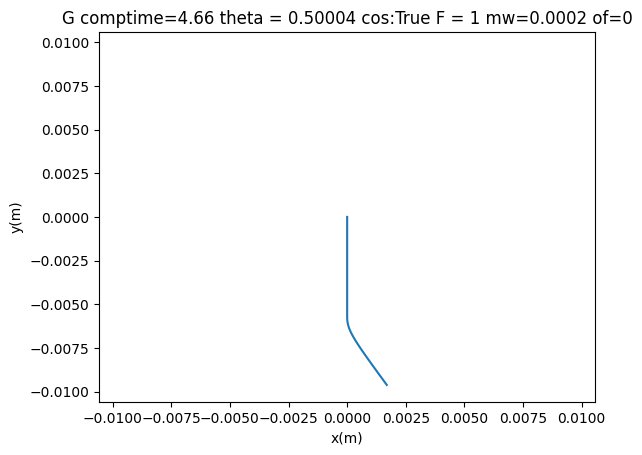

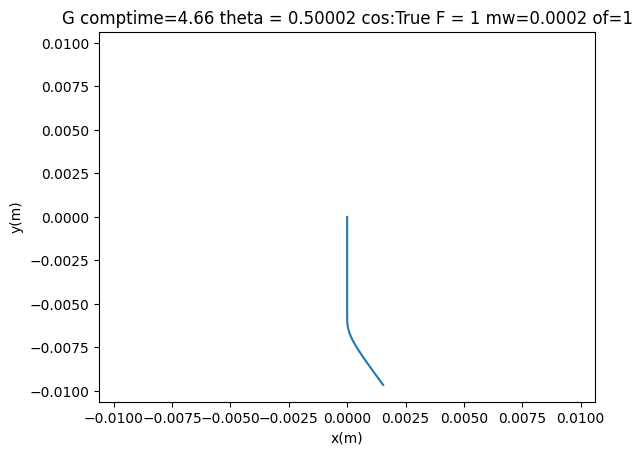

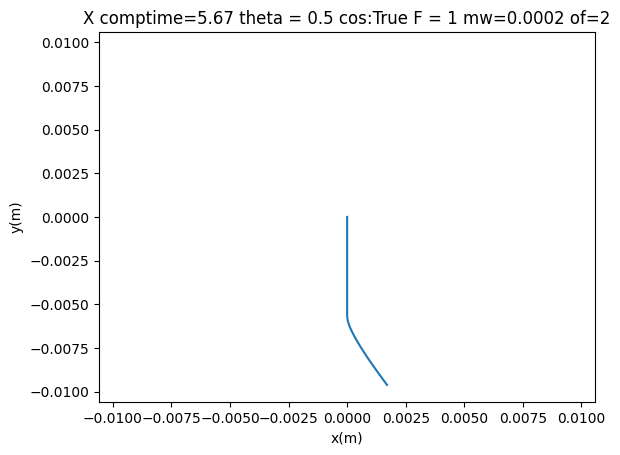

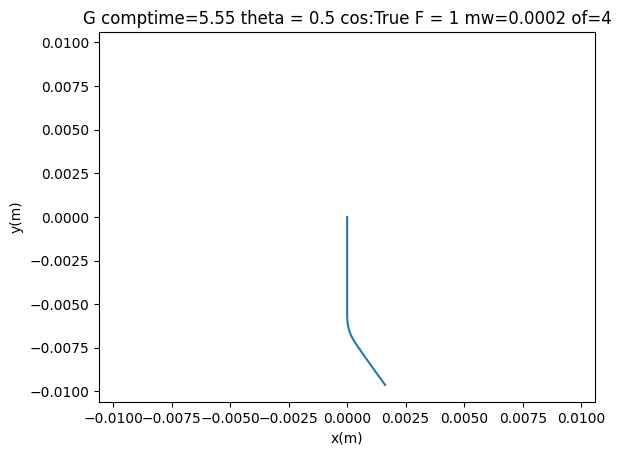

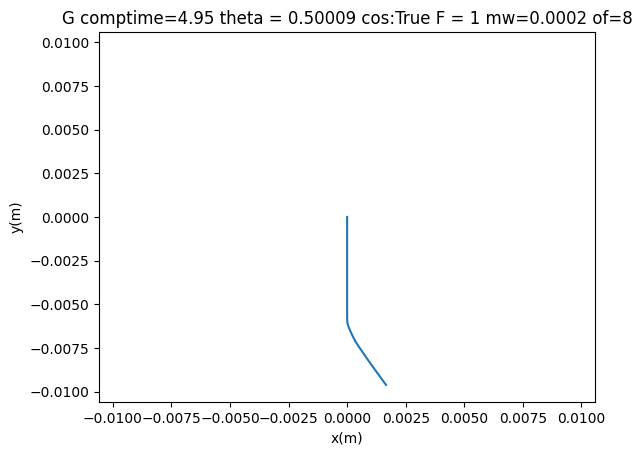

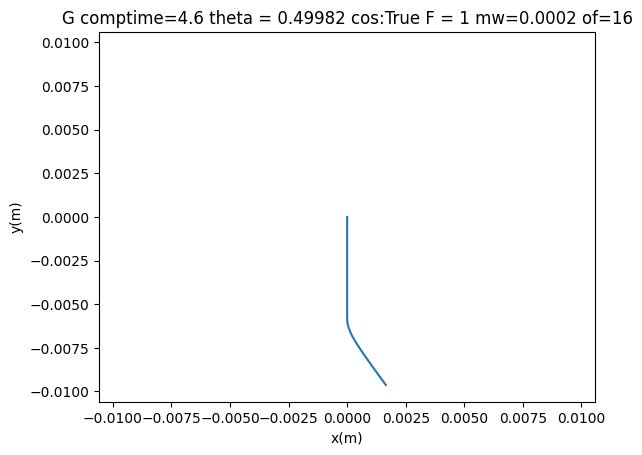

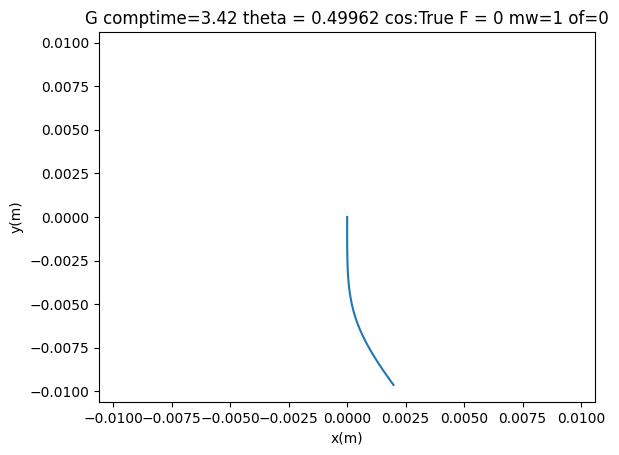

In [ ]:
theta_test = [0.5, 0.1, 0.001, 0.000001]
min_width_test = [1, 0.01, 0.0002]
cos_test = [True, False]
F_test = [1000,100,10,1,0]
oscillation_frequency_test = [0,1,2,4,8,16]
N = 0
T = 0
N_Passed = 0
for thet in theta_test:
    for cos in cos_test:
        for Fs in F_test:
            for mw in min_width_test:
                for of in oscillation_frequency_test:

                    if Fs< 9 and not cos:
                        continue
                #Cosine only bending demo
                    tol =  mpmathify(0.001)
                    Sf = 10**-2
                    S = mpmathify("1E-2")
                    E = mpmathify("78E9")
                    #To find a bending of angle theta:
                    #If F is zero, do a search on F2
                    #If F is nonzero and F2 is zero do a search on M0
                    #If both F and F2 are nonzero do a search on F2
                    

                    
                    #Define geometry of the flexure
                    def If(s):
                        return ((s - 0.005)**2/ ((0.005**(2))) + mw)**3 * ((1*10**-3)**3 * 10**-4/12) * np.exp(np.sin(np.pi *2 * s/Sf * of))
                    
                    def I(s):
                        return mpmathify(If(float(s)))
                    
                    grid = mp.matrix(np.linspace(0,0.01,100))
                    #print(grid)
                    #print(grid[len(grid) - 1],"GRID last entry")
                    Isamples = mp.matrix(If(np.linspace(0,0.01,100)))
                    #floating precision
                    mp.dps = 40
                    
                    
                    
                    Ti = time.time_ns()
                    S, F, Es = bend_samples(grid, Isamples, order = 4, E = E, Fsin = mpmathify(Fs), Fcos = cos, theta0 = mpmathify(thet), tol = tol)
                    Tf = time.time_ns()

                    S = np.array(S, dtype = "float")
                    F = np.array(F, dtype = "float")
                    Es = np.array(Es, dtype = "float")
                    #plt.plot(S,F[:,-2])
                    #plt.title("Angle over the fiber")
                    #plt.show()
                    #plt.title("Error")
                    #plt.plot(S,Es[:,-2])

                    
                    xs,zs = integrate_xz([x[1] for x in list(F)],S)
                    #plot limits to give perceived geometry
                    lm = [-1.1*np.max([np.max(np.abs(xs)),np.max(np.abs(zs))]),1.1*np.max([np.max(np.abs(xs)),np.max(np.abs(zs))])]
                    
                    plt.xlim(lm)
                    plt.ylim(lm)
                    plt.plot(xs,zs)
                    #Small total angle error and tolerance for end angle met?
                    PASSED = np.sum(np.abs(Es[:,-2])) < thet * tol and  np.sum(np.abs(Es[:,-2])) < 0.015 and np.abs(F[-1,-2] - mpmathify(thet))/ mpmathify(thet) < tol
                    
                    T += (Tf-Ti)/10**9
                    N +=1
                    if PASSED:
                        N_Passed += 1
                        PASSED = "G"
                    else:
                        PASSED = "X"
                    plt.title(PASSED+ " comptime="+str(round((Tf-Ti)/10**9,2))+" theta = " + str(round(F[-1][-2],5)) + " cos:" + str(cos) + " F = " + str(round(Fs)) + " mw=" + str(round(mw,5)) + " of=" + str(round(of)))
                    plt.xlabel("x(m)")
                    plt.ylabel("y(m)")
                    plt.show()
                    
        
        

In [6]:
print(N, N_Passed, "in ", T / N," average time (s) per bend")

153 143 in  4.294450593450979  average time (s) per bend
